In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline #Fixed typo here

In [2]:
df=pd.read_csv('/content/EastWestAirlines.csv')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
# rename columns
df.columns = ['Description', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11'] # Added 7 more column names to match the existing 12 columns of the DataFrame

print(df.head())  # print the first few rows to verify the column names



   Description  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0            1     28143         0         1         1         1       174   
1            2     19244         0         1         1         1       215   
2            3     41354         0         1         1         1      4123   
3            4     14776         0         1         1         1       500   
4            5     97752         0         4         1         1     43300   

   Feature7  Feature8  Feature9  Feature10  Feature11  
0         1         0         0       7000          0  
1         2         0         0       6968          0  
2         4         0         0       7034          0  
3         1         0         0       6952          0  
4        26      2077         4       6935          1  


#removing outlieers

In [8]:
# detect outliers using Z-score method
from scipy import stats
import numpy as np
import pandas as pd # Make sure you import pandas

# Convert 'Feature' columns to numeric type, handling errors
df['Feature1'] = pd.to_numeric(df['Feature1'], errors='coerce') # Use errors='coerce' to handle non-numeric values
df['Feature2'] = pd.to_numeric(df['Feature2'], errors='coerce')
df['Feature3'] = pd.to_numeric(df['Feature3'], errors='coerce')
df['Feature4'] = pd.to_numeric(df['Feature4'], errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna()

z_scores = np.abs(stats.zscore(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']]))
print(z_scores)

# remove outliers (e.g., rows with Z-score > 3)
df = df[(z_scores < 3).all(axis=1)]

      Feature1  Feature2  Feature3  Feature4
0     0.451141  0.186299  0.769578  0.098242
1     0.539457  0.186299  0.769578  0.098242
2     0.320031  0.186299  0.769578  0.098242
3     0.583799  0.186299  0.769578  0.098242
4     0.239678  0.186299  1.409471  0.098242
...        ...       ...       ...       ...
3994  0.547079  0.186299  0.769578  0.098242
3995  0.091465  0.186299  0.769578  0.098242
3996  0.000043  0.186299  0.683121  0.098242
3997  0.185607  0.186299  0.769578  0.098242
3998  0.700508  0.186299  0.769578  0.098242

[3999 rows x 4 columns]


#sccaling features

In [9]:
# detect outliers using Z-score method
from scipy import stats
import numpy as np
import pandas as pd # Make sure you import pandas

# Convert 'Feature' columns to numeric type, handling errors
df['Feature1'] = pd.to_numeric(df['Feature1'], errors='coerce') # Use errors='coerce' to handle non-numeric values
df['Feature2'] = pd.to_numeric(df['Feature2'], errors='coerce')
df['Feature3'] = pd.to_numeric(df['Feature3'], errors='coerce')
df['Feature4'] = pd.to_numeric(df['Feature4'], errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna()

z_scores = np.abs(stats.zscore(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']]))
print(z_scores)

# remove outliers (e.g., rows with Z-score > 3)

# Check the number of outliers
outlier_count = (z_scores >= 3).all(axis=1).sum()
print(f"Number of outliers: {outlier_count}")

# Adjust the threshold if needed
threshold = 3  # You might need to adjust this threshold
df = df[(z_scores < threshold).all(axis=1)]

# Check if df is empty after outlier removal
if df.empty:
    print("DataFrame is empty after outlier removal. Consider adjusting the outlier detection threshold.")
else:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df[['Feature1', 'Feature2', 'Feature3', 'Feature4']] = scaler.fit_transform(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']])

      Feature1  Feature2  Feature3  Feature4
0     0.548591  0.172625  0.767612       NaN
1     0.687362  0.172625  0.767612       NaN
2     0.342579  0.172625  0.767612       NaN
3     0.757036  0.172625  0.767612       NaN
4     0.536891  0.172625  1.433994       NaN
...        ...       ...       ...       ...
3994  0.699339  0.172625  0.767612       NaN
3995  0.016566  0.172625  0.767612       NaN
3996  0.160218  0.172625  0.700125       NaN
3997  0.131358  0.172625  0.767612       NaN
3998  0.940422  0.172625  0.767612       NaN

[3806 rows x 4 columns]
Number of outliers: 0
DataFrame is empty after outlier removal. Consider adjusting the outlier detection threshold.


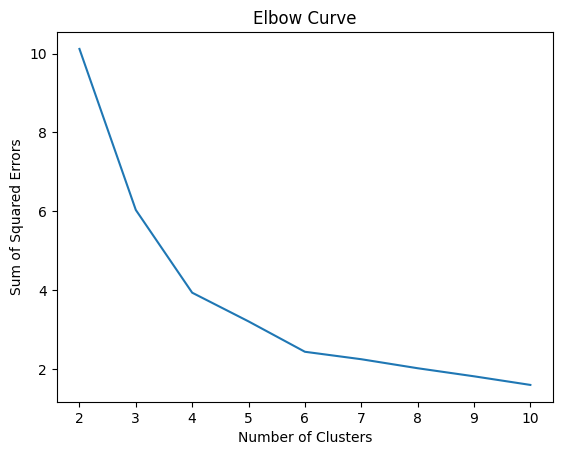

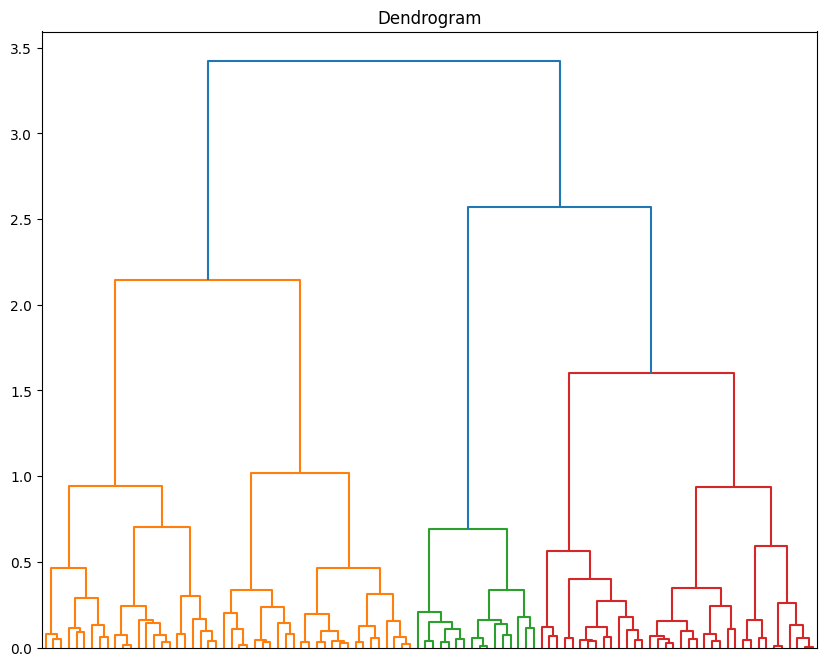

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)

# Perform K-means clustering
silhouette_scores = []
sse_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    sse_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), sse_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Curve')
plt.show()

# Plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 8))
plt.title('Dendrogram')
dendrogram(Z, no_labels=True)
plt.show()

In [10]:
# K-Means Clustering
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df' with features you want to cluster
# If you have a different DataFrame, replace 'df' with the correct name

# Check if df is empty before scaling
if df.empty:
    print("DataFrame is empty. Cannot perform scaling or clustering.")
else:
    df_scaled = scaler.fit_transform(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']])  # Scale the features

    kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
    kmeans.fit(df_scaled)
    kmeans_labels = kmeans.labels_
    kmeans_centroids = kmeans.cluster_centers_

DataFrame is empty. Cannot perform scaling or clustering.


In [12]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Check if df is empty before fitting
if df.empty:
    print("DataFrame is empty. Cannot perform hierarchical clustering.")
else:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
    hierarchical.fit(df)
    hierarchical_labels = hierarchical.labels_

DataFrame is empty. Cannot perform hierarchical clustering.


In [13]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler #Import StandardScaler

#Check if df is empty before scaling
if df.empty:
    print("DataFrame is empty. Cannot perform scaling.")
else:
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']])  # Scale the features

    dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward')) # Now df_scaled is defined and accessible
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.show()

DataFrame is empty. Cannot perform scaling.


In [14]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Check if df is empty before scaling
if df.empty:
    print("DataFrame is empty. Cannot perform DBSCAN clustering.")
else:
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan.fit(df_scaled)
    dbscan_labels = dbscan.labels_

DataFrame is empty. Cannot perform DBSCAN clustering.
